In [86]:
import pyfesom2 as pf
import xarray as xr
import os
import pandas as pd
from collections import OrderedDict
from itertools import product
import matplotlib.pylab as plt
%matplotlib inline

In [87]:
# parameters cell
meshpath = '/p/project/chhb19/streffing1/input/fesom2/core2/'
abg = [0, 0, 0]
input_paths = ['/p/scratch/chhb19/jstreffi/runtime/awicm-3.1/PICT/outdata/fesom/']
input_names = ['PICT']
years = range(1850, 2049)
figsize=(10, 5)
hemisphere = ['N','S']
dpi = 200
ofile = None

In [88]:
if input_names is None:
    input_names = []
    for run in input_paths:
        run = os.path.join(run, '')
        input_names.append(run.split('/')[-2])

In [89]:
mesh = pf.load_mesh(meshpath, abg=abg, 
                    usepickle=True, usejoblib=False)

/p/project/chhb19/streffing1/input/fesom2/core2/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /p/project/chhb19/streffing1/input/fesom2/core2/pickle_mesh_py3_fesom2


In [90]:
a_ice = OrderedDict()
print(type(a_ice))
# data_reference = pf.get_data(reference_path, variable, reference_years, mesh, depth = depth, silent=True)
for exp_path, exp_name  in zip(input_paths, input_names):
    a_ice[exp_name] = {}
    a_ice[exp_name]['data'] = pf.get_data(exp_path, 'a_ice', years, mesh, how=None, compute=False, silent=True)

<class 'collections.OrderedDict'>


In [91]:
ice_area = {}
for key, value in a_ice.items():
    ice_area[key] = {}
    for h in hemisphere:
        ice_area[key][h] = pf.ice_area(value['data'], mesh, hemisphere=h)

/p/project/chhb19/jstreffi/software/miniconda3/envs/pyfesom2/lib/python3.9/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


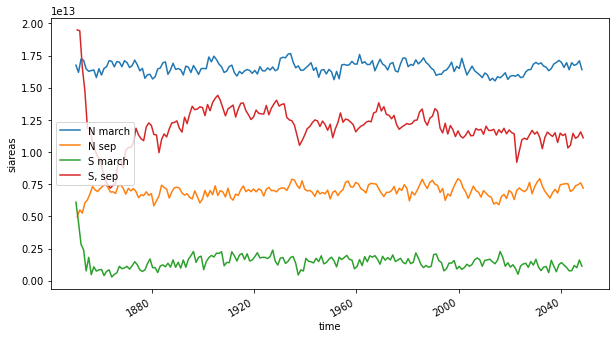

In [92]:
plt.figure(figsize=figsize)
n = 0
for key, value in ice_area.items():
    for h in hemisphere:
        for month in [3,9]:
            toplot = value[h].sel(time=value[h].time.dt.month.isin([month]))
            if n < 10:
                toplot.plot(label=key, linestyle='-')
            else:
                toplot.plot(label=key, linestyle='--')
            n = n+1
plt.legend(['N march', 'N sep', 'S march', 'S, sep'])
if ofile is not None:
    ofile_long = f"{ofile}_icearea_combined.png"
    plt.savefig(f"{ofile_long}", dpi=dpi)
    os.system(f'convert {ofile_long} -trim {ofile_long}_trimmed.png')
    os.system(f'mv {ofile_long}_trimmed.png {ofile_long}')

In [93]:
ice_ext = {}
for key, value in a_ice.items():
    ice_ext[key] = {}
    for h in hemisphere:
        ice_ext[key][h] = pf.ice_ext(value['data'], mesh, hemisphere=h)

/p/project/chhb19/jstreffi/software/miniconda3/envs/pyfesom2/lib/python3.9/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


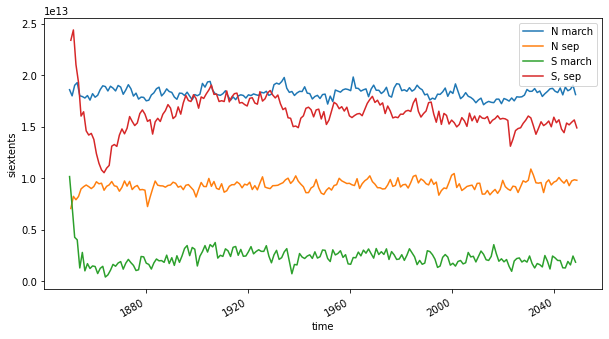

In [94]:
plt.figure(figsize=figsize)
n = 0
for key, value in ice_ext.items():
    for h in hemisphere:
        for month in [3,9]:
            toplot = value[h].sel(time=value[h].time.dt.month.isin([month]))
            if n < 10:
                toplot.plot(label=key, linestyle='-')

            else:
                toplot.plot(label=key, linestyle='--')
            n = n+1
plt.legend(['N march', 'N sep', 'S march', 'S, sep'])
if ofile is not None:
    ofile_long = f"{ofile}_iceext_combined.png"
    plt.savefig(f"{ofile_long}", dpi=dpi)
    os.system(f'convert {ofile_long} -trim {ofile_long}_trimmed.png')
    os.system(f'mv {ofile_long}_trimmed.png {ofile_long}')

In [95]:
m_ice = OrderedDict()
# data_reference = pf.get_data(reference_path, variable, reference_years, mesh, depth = depth, silent=True)
for exp_path, exp_name  in zip(input_paths, input_names):
    m_ice[exp_name] = {}
    m_ice[exp_name]['data'] = pf.get_data(exp_path, 'm_ice', years, mesh, how=None, compute=False, silent=True)

In [96]:
ice_vol = {}
for key, value in m_ice.items():
    ice_vol[key] = {}
    for h in hemisphere:
        ice_vol[key][h] = pf.ice_area(value['data'], mesh, hemisphere=h)

/p/project/chhb19/jstreffi/software/miniconda3/envs/pyfesom2/lib/python3.9/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


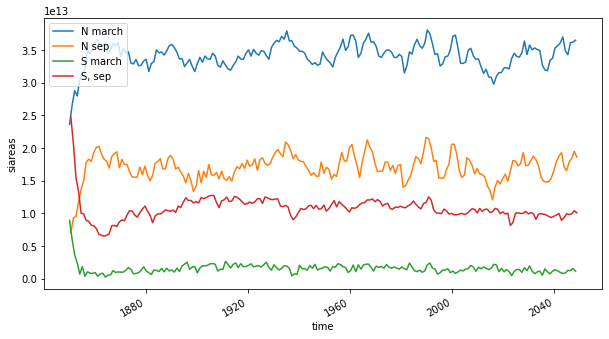

In [97]:
plt.figure(figsize=figsize)
n = 0
for key, value in ice_vol.items():
    for h in hemisphere:
        for month in [3,9]:
            toplot = value[h].sel(time=value[h].time.dt.month.isin([month]))
            if n < 10:
                toplot.plot(label=key, linestyle='-')

            else:
                toplot.plot(label=key, linestyle='--')
            n = n+1
plt.legend(['N march', 'N sep', 'S march', 'S, sep'])
if ofile is not None:
    ofile_long = f"{ofile}_icevol_combined.png"
    plt.savefig(f"{ofile_long}", dpi=dpi)
    os.system(f'convert {ofile_long} -trim {ofile_long}_trimmed.png')
    os.system(f'mv {ofile_long}_trimmed.png {ofile_long}')